In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/train.csv', index_col=0)
data.head()

,image_name,type,xmin,xmax,ymin,ymax
0,0007Date_01_08_2019.jpg,other,285,368,61,278
1,0013Date_01_08_2019.jpg,armature,187,550,101,253
2,0016Date_01_08_2019.jpg,armature,172,327,13,360
3,0019Date_01_08_2019.jpg,armature,19,267,162,237
4,0019Date_01_08_2019.jpg,armature,309,548,300,376


In [3]:
def EncodedPixels_string(pixels):
    EncodedPixels_s = ''
    x = 0
    w = 0
    for i in range(len(pixels)):
        if x==0:
            if pixels[i]==1:
                x = i
                w += 1
        else:
            if pixels[i]==1:
                w += 1
            else:
                EncodedPixels_s = EncodedPixels_s + str(x+1) + ' ' + str(w) + ' '
                x = 0
                w = 0
                
    return EncodedPixels_s

In [4]:
def EncodedPixels(data, image_name, class_type, image_shape_x=704, image_shape_y=421):
    
    data_im = data[(data['image_name']==image_name) & (data['type']==class_type)]
    
    if len(data_im)==0:
        print('Image or type not found')
        
    image_pixels = np.zeros((image_shape_x, image_shape_y))
    
    for k in range(len(data_im)):
        xmin = data_im.iloc[k]['xmin']
        xmax = data_im.iloc[k]['xmax'] + 1
        ymin = data_im.iloc[k]['ymin']
        ymax = data_im.iloc[k]['ymax'] + 1
        image_pixels[xmin:xmax, ymin:ymax]=1

    image_pixels = image_pixels.T.reshape(1, -1)[0]
    EncodedPixels_s = EncodedPixels_string(image_pixels)
    
    return EncodedPixels_s

In [5]:
result = EncodedPixels(data, '0019Date_01_08_2019.jpg', 'armature')

In [6]:
print(result)

114068 249 114772 249 115476 249 116180 249 116884 249 117588 249 118292 249 118996 249 119700 249 120404 249 121108 249 121812 249 122516 249 123220 249 123924 249 124628 249 125332 249 126036 249 126740 249 127444 249 128148 249 128852 249 129556 249 130260 249 130964 249 131668 249 132372 249 133076 249 133780 249 134484 249 135188 249 135892 249 136596 249 137300 249 138004 249 138708 249 139412 249 140116 249 140820 249 141524 249 142228 249 142932 249 143636 249 144340 249 145044 249 145748 249 146452 249 147156 249 147860 249 148564 249 149268 249 149972 249 150676 249 151380 249 152084 249 152788 249 153492 249 154196 249 154900 249 155604 249 156308 249 157012 249 157716 249 158420 249 159124 249 159828 249 160532 249 161236 249 161940 249 162644 249 163348 249 164052 249 164756 249 165460 249 166164 249 166868 249 211510 240 212214 240 212918 240 213622 240 214326 240 215030 240 215734 240 216438 240 217142 240 217846 240 218550 240 219254 240 219958 240 220662 240 221366 240

Text(0, 0.5, 'y')

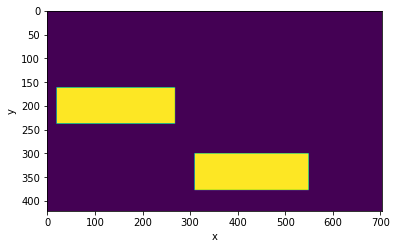

In [7]:
# decode pixels
image_shape_x = 704
image_shape_y=421
result = result.split(' ')
image_pixels = np.zeros((image_shape_x, image_shape_y))
for i in range(0, len(result)-1, 2):
    y = int(result[i])//image_shape_x 
    x = int(result[i])%image_shape_x 
    w = int(result[i+1])
    image_pixels[x:x+w, y]=1
    
plt.imshow(image_pixels.T)
plt.xlabel('x')
plt.ylabel('y')